<a href="https://colab.research.google.com/github/SherinJA/21PT28_21PT34/blob/master/AI_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rule:  ['ze', 'ns', 'ps']
Fuzzy value:  0.15625
Rule:  ['ze', 'nm', 'pm']
Fuzzy value:  0.15625
Fuzzy output:  0.15625
Defuzzified value:  175.0


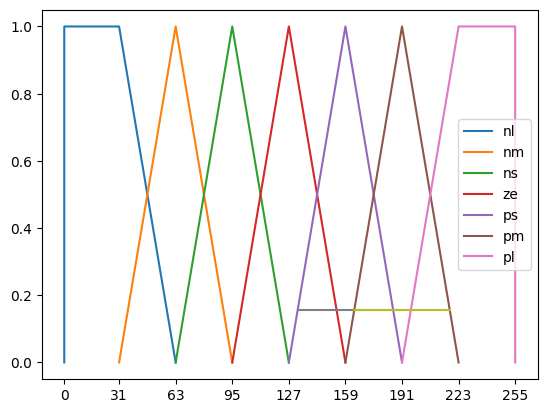

In [29]:
import matplotlib.pyplot as plt
height=1

membership_values={
                  "nl" : [0,0,31,63],
                  "nm" : [31,63,95],
                  "ns" : [63,95,127],
                  "ze" : [95,127,159],
                  "ps" : [127,159,191],
                  "pm" : [159,191,223],
                  "pl" : [191,223,255,255]
}

rules=[
        ["nl", "ze", "pl"],
         ["ze", "nl", "pl"],
         ["nm", "ze", "pm"],
         ["ns", "ps", "ps"],
         ["ps", "ns", "ns"],
         ["pl", "ze", "nl"],
         ["ze", "ns", "ps"],
         ["ze", "nm", "pm"]]


def plot_graph():
  x_vals=set()
  for label in membership_values:

    for val in membership_values[label]:
      x_vals.add(val)

    if(len(membership_values[label])==4):
      plt.plot(membership_values[label], [0,1,1,0] ,label=label)


    elif(len(membership_values[label])==3):
      plt.plot(membership_values[label], [0,1,0], label=label)

  x_val_list=list(x_vals)
  sor=sorted(x_val_list)
  plt.xticks(sor)

def isValid(rule1, rule2, speed, acc):
  speed_membership=membership_values[rule1]
  acc_membership=membership_values[rule2]

  if(speed>=speed_membership[0] and speed<=speed_membership[-1]):
    if(acc>=acc_membership[0] and acc<=acc_membership[-1]):
      return True

  return False

def fuzzification(rule,speed, acc):
  speed_mem=membership_values[rule[0]]
  acc_mem=membership_values[rule[1]]

  sa=speed_mem[0]
  sb=speed_mem[1]
  sc=speed_mem[2]

  speed_val=max(min( (speed-sa)/(sb-sa) , (sc-speed)/(sc-sb) ), 0)

  aa=acc_mem[0]
  ab=acc_mem[1]
  ac=acc_mem[2]

  acc_val=max(min((acc-aa)/(ab-aa) , (ac-acc)/(ac-ab)),0)

  return min(speed_val, acc_val) #because it is an AND

def calculate_x_val(x0,x1,y0,y1, given_y):

  m=(y1-y0)/(x1-x0)
  c=y0-(m*x0)
  result_x=(given_y-c)/m
  return result_x

def calculate_areas(rule,fuzzy_val):
  throttle_mem=membership_values[rule[2]]
  #print(throttle_mem)

  if(len(throttle_mem)==3):
    a1=calculate_x_val(throttle_mem[0],throttle_mem[1], 0 , 1, fuzzy_val)
    a2=calculate_x_val(throttle_mem[1],throttle_mem[2], 1 , 0, fuzzy_val)

  a=a2-a1
  b=throttle_mem[2]-throttle_mem[0]

  plt.plot([a1,a2],[fuzzy_val,fuzzy_val])

  #calculate area of trapezoid
  area=(0.5)*(fuzzy_val)*(a+b)

  weighted_area=area*(throttle_mem[1])

  return area, weighted_area


def calculate_throttle_control(speed, acc):
  weighted_area_sum=0
  area_sum=0

  fuzzy_vals=[]
  for rule in rules:
    if isValid(rule[0], rule[1], speed, acc):
      print("Rule: ",rule)
      fuzzy_value=fuzzification(rule, speed, acc)
      fuzzy_vals.append(fuzzy_value)
      print("Fuzzy value: ", fuzzy_value)

      x,y=calculate_areas(rule,fuzzy_value)
      area_sum+=x
      weighted_area_sum+=y

  print("Fuzzy output: ", max(fuzzy_vals))
  defuzzified_val=weighted_area_sum/area_sum
  return defuzzified_val


plot_graph()

defuzzified_val=calculate_throttle_control(100,70)

print("Defuzzified value: ",defuzzified_val)

plt.xlabel("throttle control")
plt.ylabel("membership value")
plt.legend()
plt.show()

Rule: ['ps', 'ns', 'ns']
Fuzzy value: 0.21875
Rule: ['ze', 'ns', 'ps']
Fuzzy value: 0.21875
Rule: ['ze', 'nm', 'pm']
Fuzzy value: 0.28125
Fuzzy output:  0.28125
Defuzzifed value:  151.50116009280742


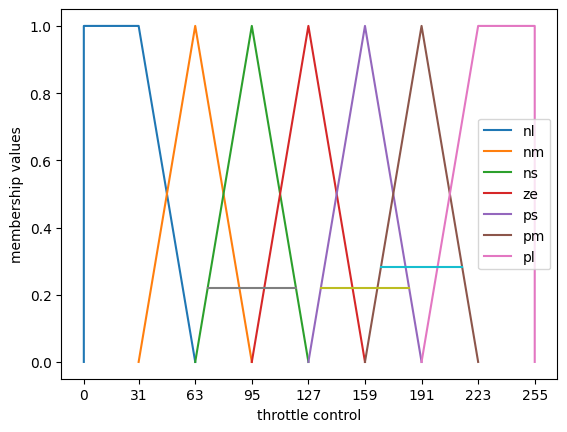

In [10]:
#TEST

import matplotlib.pyplot as plt

membership_values={
                  "nl" : [0,0,31,63],
                  "nm" : [31,63,95],
                  "ns" : [63,95,127],
                  "ze" : [95,127,159],
                  "ps" : [127,159,191],
                  "pm" : [159,191,223],
                  "pl" : [191,223,255,255]
}

rules=[
        ["nl", "ze", "pl"],
         ["ze", "nl", "pl"],
         ["nm", "ze", "pm"],
         ["ns", "ps", "ps"],
         ["ps", "ns", "ns"],
         ["pl", "ze", "nl"],
         ["ze", "ns", "ps"],
         ["ze", "nm", "pm"]]


def plot_graph():
  x_vals=set()
  for label in membership_values:
    for val in membership_values[label]:
      x_vals.add(val)
    if(len(membership_values[label])==4):
      plt.plot(membership_values[label], [0,1,1,0], label=label)
    elif(len(membership_values[label])==3):
      plt.plot(membership_values[label], [0,1,0], label=label)

  x_list=list(x_vals)
  x_sort=sorted(x_list)

  plt.xticks(x_sort)

def isValid(rule, speed, acc):
  speed_mem=membership_values[rule[0]]
  acc_mem=membership_values[rule[1]]

  sa=speed_mem[0]
  sc=speed_mem[2]

  aa=acc_mem[0]
  ac=acc_mem[2]

  if(speed>=sa and speed<=sc):
    if(acc>=aa and acc<=ac):
      return True
  return False

def calculate_fuzzy_value(speed, acc, rule):
  speed_label=rule[0]
  acc_label=rule[1]
  speed_mem=membership_values[speed_label]
  acc_mem=membership_values[acc_label]

  #considering only triangular here:
  sa=speed_mem[0]
  sb=speed_mem[1]
  sc=speed_mem[2]

  aa=acc_mem[0]
  ab=acc_mem[1]
  ac=acc_mem[2]

  speed_value=max(min((speed-sa)/(sb-sa) , (sc-speed)/(sc-sb)), 0)
  acc_value=max(min((acc-aa)/(ab-aa) , (ac-acc)/(ac-ab)), 0)

  #since AND of speed and acceleration is given in each rule , we take min here
  return min(speed_value, acc_value)

def calculate_x_val(x0,x1,y0,y1,given_y):
  m=(y1-y0)/(x1-x0)
  c=y0-(m*x0)
  x_val=(given_y-c)/m
  return x_val

def calculate_areas(rule, fuzzy_value):
  throttle_label=rule[2]
  throttle_mem=membership_values[throttle_label]

  if(len(throttle_mem)==3):
    a1=calculate_x_val(throttle_mem[0],throttle_mem[1], 0, 1, fuzzy_value)
    a2=calculate_x_val(throttle_mem[1],throttle_mem[2], 1, 0, fuzzy_value)

    a=a2-a1
    b=throttle_mem[2]-throttle_mem[0]
    h=fuzzy_value
    area=0.5*(a+b)*h
    wt_area= area*throttle_mem[1]

    plt.plot([a1,a2],[fuzzy_value,fuzzy_value])

    return area, wt_area

  if(len(throttle_mem)==4):
    a1=calculate_x_val(throttle_mem[0],throttle_mem[1], 0, 1, fuzzy_value)
    a2=calculate_x_val(throttle_mem[2],throttle_mem[3], 1, 0, fuzzy_value)

    a=a2-a1
    b=throttle_mem[3]-throttle_mem[0]
    h=fuzzy_value
    area=0.5*(a+b)*h
    center=(throttle_mem[0]+throttle_mem[3])/2
    wt_area=area(center)

    plt.plot([a1,a2],[fuzzy_value,fuzzy_value])
    return area, wt_area


def calculate_throttle_control(speed, acc):

  weighted_area_sum=0
  area_sum=0
  fuzzy_vals=[]
  for rule in rules:
    if(isValid(rule, speed, acc)):
      print("Rule:",rule)
      fuzzy_value=calculate_fuzzy_value(speed, acc, rule)
      print("Fuzzy value:",fuzzy_value)
      fuzzy_vals.append(fuzzy_value)
      x,y=calculate_areas(rule,fuzzy_value)
      area_sum+=x
      weighted_area_sum+=y

  defuz=(weighted_area_sum)/(area_sum)
  print("Fuzzy output: ", max(fuzzy_vals))
  return defuz

plot_graph()

defuzzified_value=calculate_throttle_control(100,70)

print("Defuzzifed value: ", defuzzified_value)

plt.xlabel("throttle control")
plt.ylabel("membership values")
plt.legend()
plt.show()

The fuzzy values of the crisp inputs:
[[0.   0.   0.84 0.16 0.   0.   0.  ]
 [0.   0.74 0.26 0.   0.   0.   0.  ]]
[0, 0.15625, 0.15625, 0, 0]
0 0
175.0
175.00000000000003
0 0
Crisp Output: 175.0


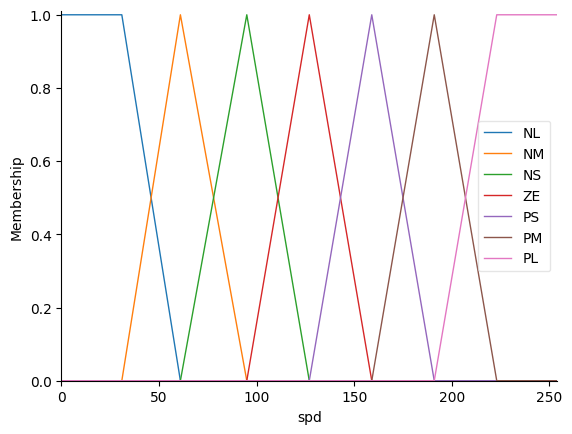

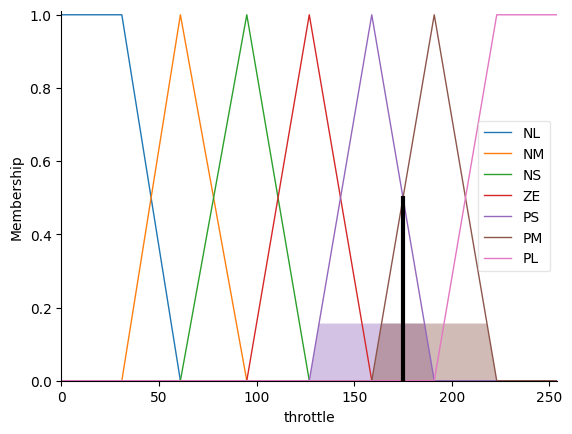

In [33]:
import numpy as np
import matplotlib as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

speed=100
acceleration=70

def openLeft(x,alpha,beta):
    if(x<alpha):
        return 1
    if alpha<x and x<=beta:
        return ((beta-x)/(beta-alpha))
    else:
        return 0


def fulltrap(x,a,b,c,d):
    if(x<a or x>d):
        return 0
    if(x>a and x<b):
        return ((x-a)/(b-a))
    if(x>b and x<c):
        return 1
    if(x>c and x<d):
        return ((d-x)/(d-c))

def openRight(x,alpha,beta):
    if(x<alpha):
        return 0
    if alpha<x and x<=beta:
        return ((x-alpha)/(beta-alpha))
    else:
        return 1

def triangular(x,a,b,c):
    return max(min((x-a)/(b-a),(c-x)/(c-b)),0)

def partition(x):
    NL=0
    NM=0
    NS=0
    ZE=0
    PS=0
    PM=0
    PL=0

    if x>0 and x<61:
        NL=openLeft(x, 31, 61)
    if x>31 and x<95:
        NM=triangular(x, 31, 61, 95)
    if x>61 and x<127:
        NS=triangular(x, 61, 95, 127)
    if x>95 and x<159:
        ZE=triangular(x, 95, 127, 159)
    if x>127 and x<191:
        PS=triangular(x, 127, 159, 191)
    if x>159 and x<223:
        PM=triangular(x, 159,191, 223)
    if x>191 and x<255:
        PL=openRight(x, 191, 223)

    return NL,NM,NS,ZE,PS,PM,PL

def rule(NLSD,NMSD,NSSD,ZESD,PSSD,PMSD,PLSD,NLAC,NMAC,NSAC,ZEAC,PSAC,PMAC,PLAC):
    PLTC1=min(NLSD,ZEAC)
    PLTC2=min(ZESD,NLAC)
    PLTC=max(PLTC1,PLTC2)

    PMTC1=min(NMSD,ZEAC)
    PMTC2=min(ZESD,NMAC)
    PMTC=max(PMTC1,PMTC2)

    PSTC1=min(NSSD,PSAC)
    PSTC2=min(ZESD,NSAC)
    PSTC=max(PSTC1, PSTC2)

    NSTC=min(PSSD,NSAC)
    NLTC=min(PLSD,ZEAC)

    return PLTC,PMTC,PSTC,NSTC,NLTC

def areaTR(mu,a,b,c):
    x1=mu*(b-a)+a
    x2=c-mu*(c-b)
    d1=(c-a)
    d2=x2-x1
    a=(0.5)*mu*(d1+d2)
    return a

def areaOL(mu,a,b):
    xOL=b-mu*(b-a)
    return 0.5*mu*(b+xOL),b/2

def areaOR(mu,a,b):
    xOR=(b-a)*mu+a
    aOR=0.5*mu*((255-a)+(255-xOR))
    return aOR,(255-a)/2+a

def areafullTrap(h,a,b,c,d):
    x1=a+(b-a)*h
    x2=d-(d-c)*h
    d1=x2-x1
    d2=d-a
    aft=0.5*h*(d1+d2)
    return aft

def defuzzyfication(PLTC,PMTC,PSTC,NSTC,NLTC):
    areaPL=0
    areaPM=0
    areaPS=0
    areaNS=0
    areaNL=0

    cPL=0
    cPM=0
    cPS=0
    cNS=0
    cNL=0

    if PLTC!=0:
        areaPL,cPL=areaOR(PLTC, 191, 255)
    if PMTC!=0:
        areaPM=areaTR(PMTC, 159, 191, 223)
        cPM=191
    if PSTC!=0:
        areaPS=areaTR(PSTC, 127, 159, 191)
        cPS=159
    if NSTC != 0:
        areaNS = areaTR(NSTC, 61, 95, 127)
        cNS = 95

    if NLTC !=0:
        areaNL, cNL = areaOL(NLTC, 0, 61)
    print(cPL,cNL)

    numerator = areaPL*cPL + areaPM*cPM + areaPS*cPS + areaNS*cNS + areaNL*cNL
    denominator = areaPL + areaPM + areaPS + areaNS + areaNL
    if denominator ==0:
        print("No rules exist to give the result")
        return 0
    else:
        crispOutput = numerator/denominator
        return crispOutput

NLSD,NMSD,NSSD,ZESD,PSSD,PMSD,PLSD=partition(speed)
NLAC,NMAC,NSAC,ZEAC,PSAC,PMAC,PLAC=partition(acceleration)

output=[[NLSD,NMSD,NSSD,ZESD,PSSD,PMSD,PLSD],[NLAC,NMAC,NSAC,ZEAC,PSAC,PMAC,PLAC]]

print("The fuzzy values of the crisp inputs:")
print(np.round(output,2))

PLTC, PMTC, PSTC, NSTC, NLTC = rule(NLSD,NMSD,NSSD,ZESD,PSSD,PMSD,PLSD,NLAC,NMAC,NSAC,ZEAC,PSAC,PMAC,PLAC)
print([PLTC, PMTC, PSTC, NSTC, NLTC])
crispOutputFinal = defuzzyfication(PLTC, PMTC, PSTC, NSTC, NLTC)
print(crispOutputFinal)

ip1=np.arange(0,255,1)
spd = ctrl.Antecedent(ip1, 'spd')
acc = ctrl.Antecedent(ip1, 'acc')
throttle = ctrl.Consequent(ip1, 'throttle')


spd['NL']=fuzz.trapmf(spd.universe, [0,0,31,61])
spd['NM']=fuzz.trimf(spd.universe, [31,61,95])
spd['NS']=fuzz.trimf(spd.universe, [61,95,127])
spd['ZE']=fuzz.trimf(spd.universe, [95,127,159])
spd['PS']=fuzz.trimf(spd.universe, [127,159,191])
spd['PM']=fuzz.trimf(spd.universe, [159,191,223])
spd['PL']=fuzz.trapmf(spd.universe, [191,223,255,255])

acc['NL']=fuzz.trapmf(acc.universe, [0,0,31,61])
acc['NM']=fuzz.trimf(spd.universe, [31,61,95])
acc['NS']=fuzz.trimf(spd.universe, [61,95,127])
acc['ZE']=fuzz.trimf(spd.universe, [95,127,159])
acc['PS']=fuzz.trimf(spd.universe, [127,159,191])
acc['PM']=fuzz.trimf(spd.universe, [159,191,223])
acc['PL']=fuzz.trapmf(spd.universe, [191,223,255,255])

throttle['NL']=fuzz.trapmf(spd.universe, [0,0,31,61])
throttle['NM']=fuzz.trimf(spd.universe, [31,61,95])
throttle['NS']=fuzz.trimf(spd.universe, [61,95,127])
throttle['ZE']=fuzz.trimf(spd.universe, [95,127,159])
throttle['PS']=fuzz.trimf(spd.universe, [127,159,191])
throttle['PM']=fuzz.trimf(spd.universe, [159,191,223])
throttle['PL']=fuzz.trapmf(spd.universe, [191,223,255,255])

r1=ctrl.Rule(spd['NL'] & acc['ZE'] , throttle['PL'])
r2=ctrl.Rule(spd['NL'] & acc['ZE'] , throttle['PL'])
r3=ctrl.Rule(spd['NM'] & acc['ZE'] , throttle['PM'])
r4=ctrl.Rule(spd['NS'] & acc['PS'] , throttle['PS'])
r5=ctrl.Rule(spd['PS'] & acc['NS'] , throttle['NS'])
r6=ctrl.Rule(spd['PL'] & acc['ZE'] , throttle['NL'])
r7=ctrl.Rule(spd['ZE'] & acc['NS'] , throttle['PS'])
r8=ctrl.Rule(spd['ZE'] & acc['NM'] , throttle['PM'])

spd.view()
throttle_control = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8])
sA = ctrl.ControlSystemSimulation(throttle_control)
sA.input['spd']=100
sA.input['acc']=70
sA.compute()
throttle.view(sim = sA)
print(sA.output['throttle'])

# Defuzzification
crispOutputFinal = defuzzyfication(PLTC, PMTC, PSTC, NSTC, NLTC)
print("Crisp Output:", crispOutputFinal)

In [32]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=f54ae08c1194709399147d6533eac8943bb9fc27d86582c53b088bec2a14d9ab
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
